In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/15
750/750 [==============================] - 36s 47ms/step - loss: 0.5067 - accuracy: 0.8152 - val_loss: 0.3518 - val_accuracy: 0.8760
Epoch 2/15
750/750 [==============================] - 26s 35ms/step - loss: 0.3263 - accuracy: 0.8812 - val_loss: 0.3055 - val_accuracy: 0.8878
Epoch 3/15
750/750 [==============================] - 25s 34ms/step - loss: 0.2767 - accuracy: 0.8983 - val_loss: 0.3081 - val_accuracy: 0.8844
Epoch 4/15
750/750 [==============================] - 26s 35ms/step - loss: 0.2454 - accuracy: 0.9104 - val_loss: 0.2653 - val_accuracy: 0.9048
Epoch 5/15
750/750 [==============================] - 26s 34ms/step - loss: 0.2197 - accuracy: 0.9176 - val_loss: 0.2571 - val_accuracy: 0.9057
Epoch 6/15
750/750 [==============================] - 26s 34ms/step - loss: 0.1999 - accuracy: 0.9259 - val_loss: 0.2508 - val_accuracy: 0.9075
Epoch 7/15
750/750 [==============================] - 25s 34ms/step - loss: 0.1801 - accuracy: 0.9333 - val_loss: 0.2508 - val_accuracy:

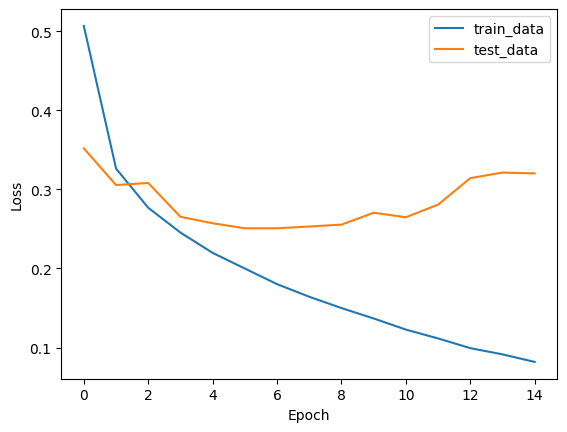

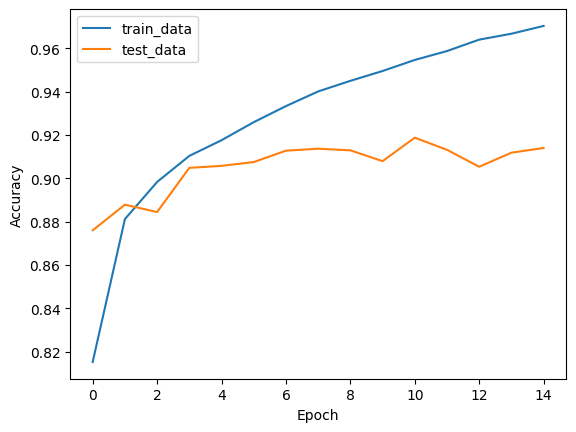

In [4]:
history = model.fit(train_data, train_labels, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history.history['loss'], label='train_data')
plt.plot(history.history['val_loss'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_data')
plt.plot(history.history['val_accuracy'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [5]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Точність на тестовому наборі: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 2s 6ms/step - loss: 0.3391 - accuracy: 0.9095
Точність на тестовому наборі: 90.95%
